In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
import os
import math
from sympy import symbols, Eq, diff, solve
from numba import jit 

100%|██████████| 27/27 [00:00<00:00, 40.56it/s]


mean of background images:    4.221334


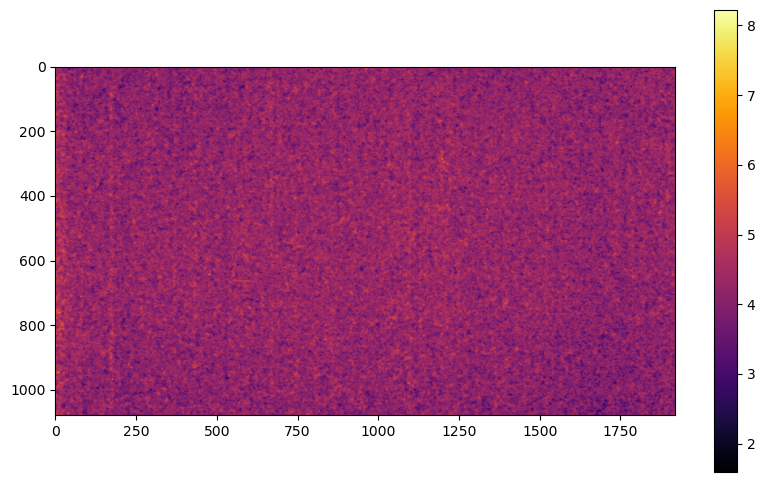

In [15]:
# Reading images
# calculating mean background Image
path = "background/"
Images = []
count_1 = 0

for filename in tqdm(os.listdir(path)):
    IMG = (cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)).astype('float32')
    Images.append(np.array(IMG))
    count_1 = count_1 + 1

# Algorithm
Means = []
for i in range(0, count_1):
    Img = Images[i]
    mean_Img = np.mean(Img)
    Means.append(mean_Img)

backgroung_mean = np.mean(Means)
print("mean of background images:   ", backgroung_mean)

mean_back_Image = 0
for i in range(0, count_1):
    mean_back_Image = mean_back_Image + Images[i]    
mean_back_Image = mean_back_Image / count_1
plt.figure(figsize=(10, 6))
plt.imshow(mean_back_Image, cmap=plt.cm.inferno)    
plt.colorbar()
# 1 done

100%|██████████| 28/28 [00:00<00:00, 30.76it/s]


I0_bar:        161.95767647879464
sigma:        1.2084359562332874


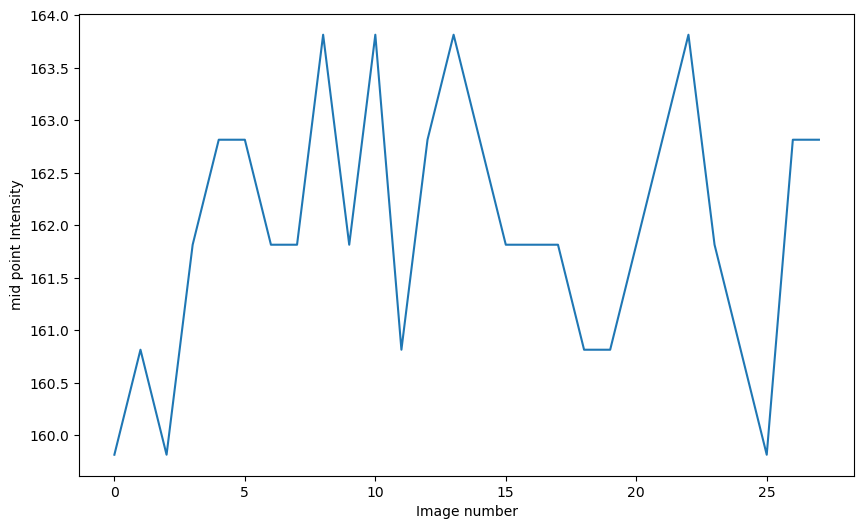

In [16]:
# Reading images
path = "c0/"
Images = []
count_2 = 0

for filename in tqdm(os.listdir(path)):
    IMG = (cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)).astype('float32')
    Images.append(np.array(IMG) - mean_back_Image)
    count_2 = count_2 + 1
    
H, W = IMG.shape[:2]
mid_H = int(np.floor((H+1)/2)-1) # Even => Odd   
mid_W = int(np.floor((W+1)/2)-1)

numid = []
ALL = []
for i in range(0, count_2):
    mid_Intensity = Images[i][mid_H,mid_W]
    numid.append([i , mid_Intensity])
ALL = np.array(numid) 

Img_num = ALL[:,0]
Img_mid_Intesity = ALL[:,1]

I0_bar = np.mean(Img_mid_Intesity)
sigma = np.sqrt(np.sum((Img_mid_Intesity - I0_bar)**2)/ (count_2 - 1))
print("I0_bar:       ", I0_bar)
print("sigma:       ", sigma)

plt.figure(figsize=(10, 6))
plt.plot(Img_num, Img_mid_Intesity)
plt.xlabel('Image number')
plt.ylabel('mid point Intensity')
plt.show()

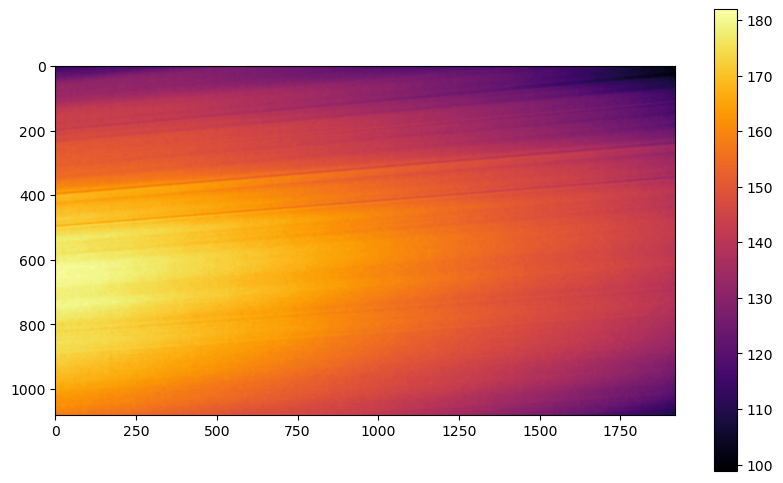

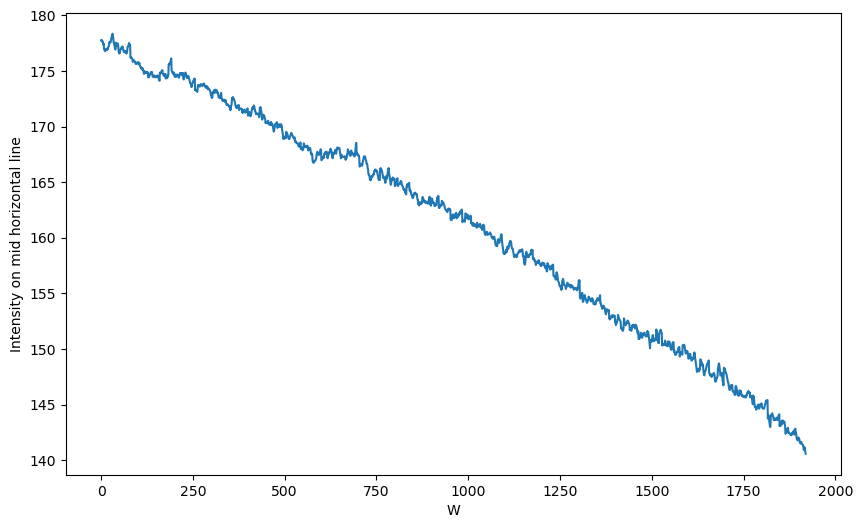

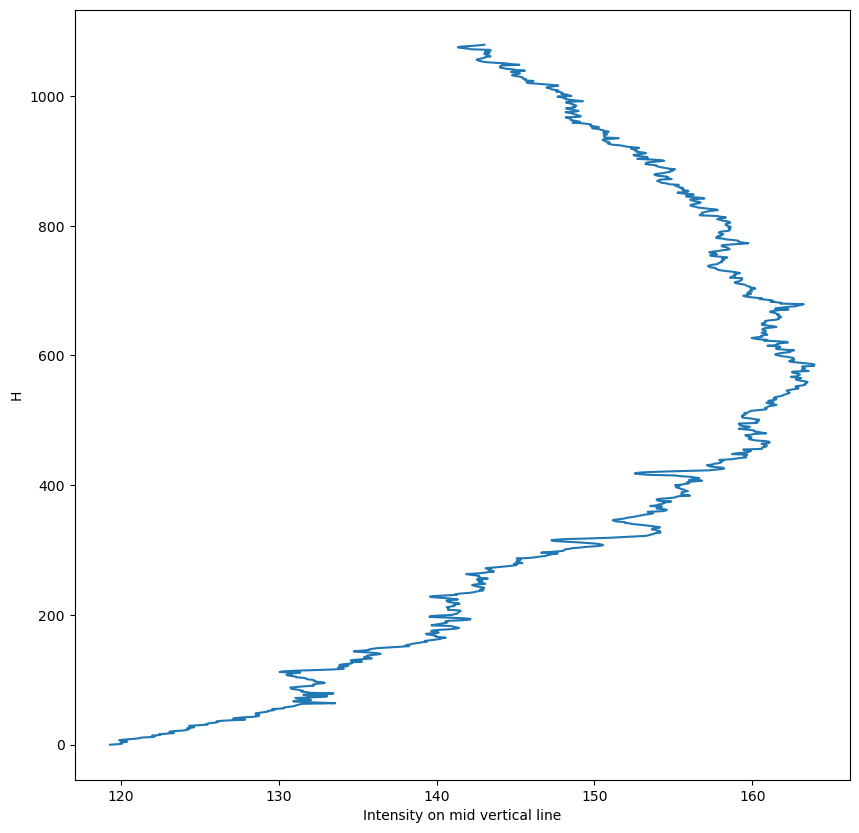

In [17]:
# Reading images   C0
Image = 0
for i in range(0, count_2):
    Image = Image + Images[i]    
C0 = Image / count_2       # C0
plt.figure(figsize=(10, 6))
plt.imshow(C0, cmap=plt.cm.inferno)    
plt.colorbar()

horizon_Img_mean = []
ALL = []
for i in range(0, W):
    hrz_line = C0[mid_H,i]
    horizon_Img_mean.append([i , hrz_line])

ALL = np.array(horizon_Img_mean) 
point_num = ALL[:,0]
horizon_Img_mean = ALL[:,1]
plt.figure(figsize=(10, 6))
plt.plot(point_num, horizon_Img_mean)
plt.xlabel('W')
plt.ylabel('Intensity on mid horizontal line')
plt.show()

vertical_Img_mean = []
ALL = []
for j in range(0,H):
    ver_line = C0[j,mid_W]
    vertical_Img_mean.append([j, ver_line])

ALL = np.array(vertical_Img_mean) 
point_num = ALL[:,0]
horizon_Img_mean = ALL[:,1]
plt.figure(figsize=(10, 10))
plt.plot(horizon_Img_mean, point_num)
plt.xlabel('Intensity on mid vertical line')
plt.ylabel('H')
plt.show()

100%|██████████| 40/40 [00:01<00:00, 31.16it/s]


149.66502
Erorr percent pic 4:   1.5535701522478402
Erorr percent pic 5:   1.5552037071971694
Erorr percent pic 6:   1.55411217860825
[[1.0173888  1.0233294  1.0132114  ... 0.89554036 0.8970099  0.91330546]
 [1.0308268  1.0497795  1.0500615  ... 0.89313614 0.8923521  0.8716845 ]
 [1.0392562  1.0526953  1.0549902  ... 0.8918821  0.9017464  0.85281235]
 ...
 [1.0018078  1.002033   1.002261   ... 0.8419684  0.8227884  0.8107508 ]
 [1.0022601  1.0022595  1.0027134  ... 0.8571256  0.8550367  0.8493376 ]
 [1.0018067  1.0018069  1.0085887  ... 0.84896266 0.87326115 0.89147675]]


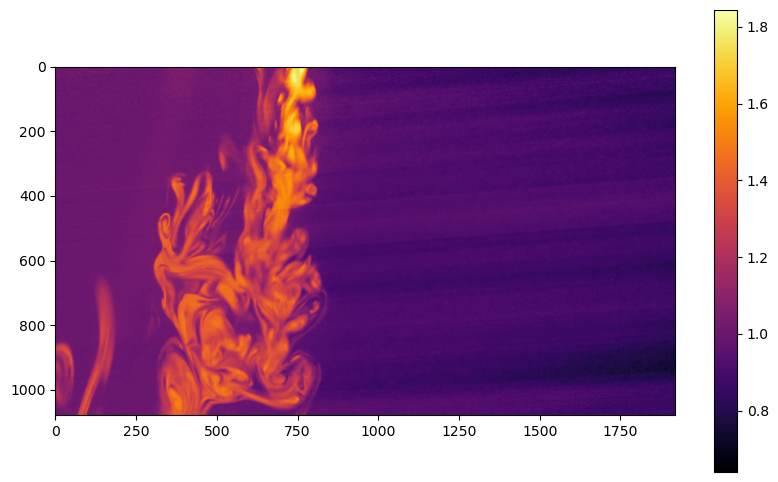

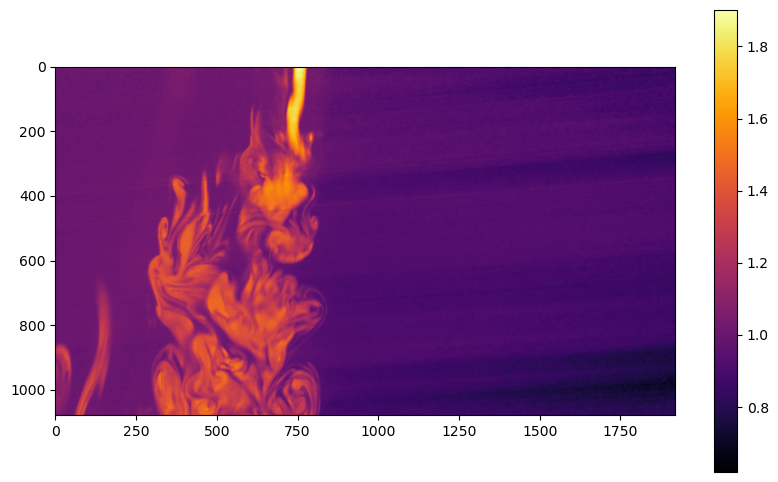

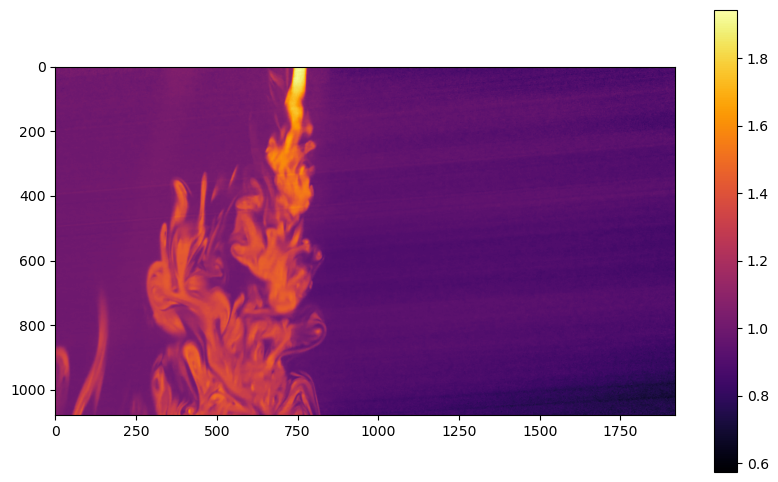

In [18]:
# Reading images
path = "C/"
Images = []
count_3 = 0

for filename in tqdm(os.listdir(path)):
    IMG = (cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)).astype('float32')
    Images.append(np.array(IMG) - mean_back_Image)
    count_3 = count_3 + 1

C_c01 = Images[5] / C0
C_c02 = Images[6] / C0
C_c03 = Images[7] / C0

I_bar = np.mean(Images[5])
print(I_bar)
error = ((sigma/I0_bar) + (sigma/I_bar))*100
print("Erorr percent pic 4:  ", error)
I_bar = np.mean(Images[6])
error = ((sigma/I0_bar) + (sigma/I_bar))*100
print("Erorr percent pic 5:  ", error)
I_bar = np.mean(Images[7])
error = ((sigma/I0_bar) + (sigma/I_bar))*100
print("Erorr percent pic 6:  ", error)

print(C_c01)
plt.figure(figsize=(10, 6))
plt.imshow(C_c01, cmap=plt.cm.inferno)
plt.colorbar()  
plt.show() 
plt.figure(figsize=(10, 6))
plt.imshow(C_c02, cmap=plt.cm.inferno) 
plt.colorbar()  
plt.show() 
plt.figure(figsize=(10, 6))
plt.imshow(C_c03, cmap=plt.cm.inferno) 
plt.colorbar()  
plt.show()


100%|██████████| 13/13 [00:00<00:00, 31.11it/s]


mean of 26 degree: 
 [[114.156685 115.695145 116.34472  ... 101.475784 102.59544  103.94017 ]
 [114.575485 115.61539  116.18802  ... 100.74073  101.20797  102.09401 ]
 [115.10827  115.84046  116.45297  ... 100.66381  100.93163  100.78064 ]
 ...
 [158.33334  158.48436  158.45012  ... 111.205124 110.31911  107.20227 ]
 [158.29346  158.3305   158.37038  ... 109.8604   108.81766  105.81481 ]
 [158.6382   158.44444  158.13962  ... 108.04842  107.74073  105.58404 ]]


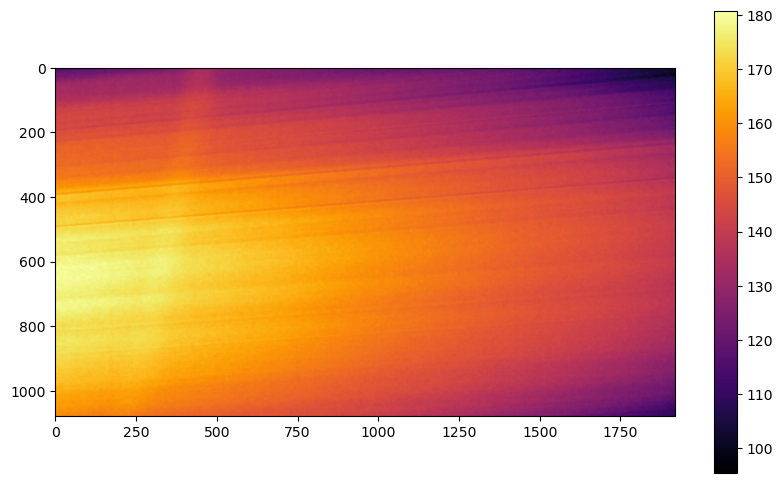

In [19]:
# Reading images
path = "T_26/"
Images = []
count_4 = 0

for filename in tqdm(os.listdir(path)):
    IMG = (cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)).astype('float32')
    Images.append(np.array(IMG) - mean_back_Image)
    count_4 = count_4 + 1

mean_26_Image = 0
for i in range(0, count_4):
    mean_26_Image = mean_26_Image + Images[i]    
mean_26_Image = mean_26_Image / count_4
mean_26_Image_reference = mean_26_Image / C0
print("mean of 26 degree: \n" , mean_26_Image)
plt.figure(figsize=(10, 6))
plt.imshow(mean_26_Image, cmap=plt.cm.inferno)  
plt.colorbar() 
# plt.figure(figsize=(10, 6))
# plt.imshow(mean_26_Image_reference, cmap=plt.cm.inferno)  
# plt.colorbar() 

100%|██████████| 30/30 [00:00<00:00, 30.06it/s]


mean of 26 degree: 
 [[34.492588  34.45925   34.10371   ... 18.129633  18.251854  17.922216 ]
 [34.637043  34.433334  33.877766  ... 18.040745  18.05926   17.65555  ]
 [34.518517  34.114803  33.588894  ... 17.607412  17.977774  17.537039 ]
 ...
 [20.5       20.574074  20.496294  ...  2.7666664  2.8037045  2.8074071]
 [20.5037    20.640741  20.570368  ...  2.7296302  2.8407404  2.8814812]
 [20.540741  20.711119  20.737034  ...  2.8407404  2.8407404  2.8814812]]


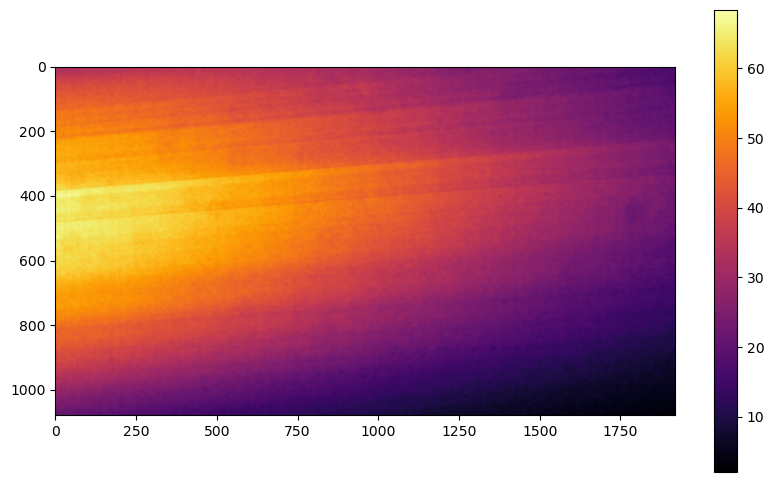

In [20]:
# Reading images
path = "T_53/"
Images = []
count_5 = 0

for filename in tqdm(os.listdir(path)):
    IMG = (cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)).astype('float32')
    Images.append(np.array(IMG) - mean_back_Image)
    count_5 = count_5 + 1

mean_53_Image = 0
for i in range(0, count_5):
    mean_53_Image = mean_53_Image + Images[i]    
mean_53_Image = mean_53_Image / count_5
mean_53_Image_reference = mean_53_Image / C0
print("mean of 26 degree: \n" , mean_53_Image)
plt.figure(figsize=(10, 6))
plt.imshow(mean_53_Image, cmap=plt.cm.inferno)
plt.colorbar()  
# plt.figure(figsize=(10, 6))
# plt.imshow(mean_53_Image_reference, cmap=plt.cm.inferno)
# plt.colorbar()  

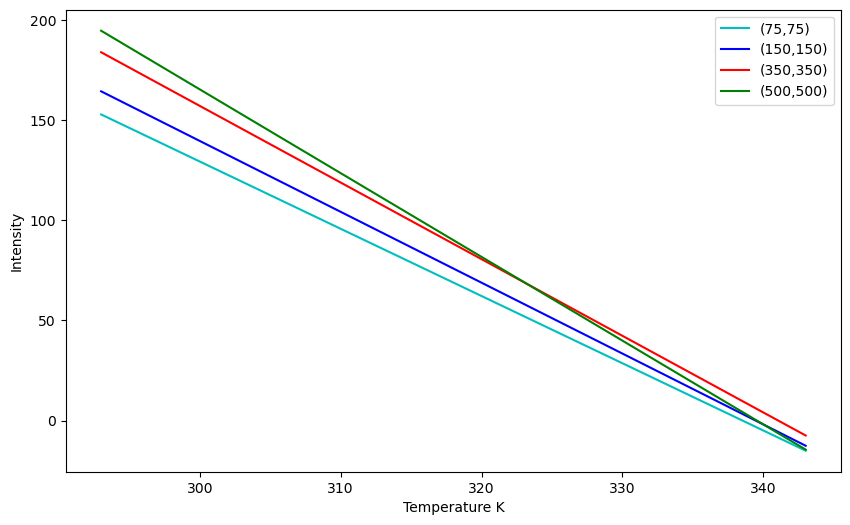

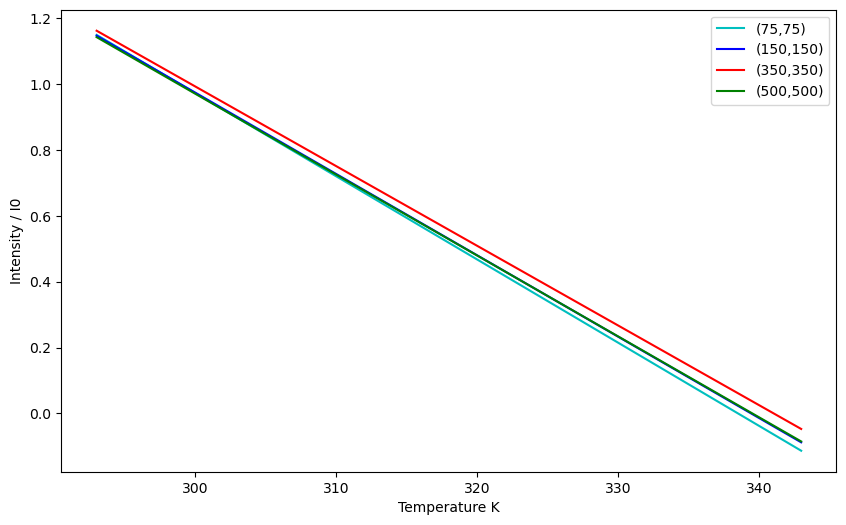

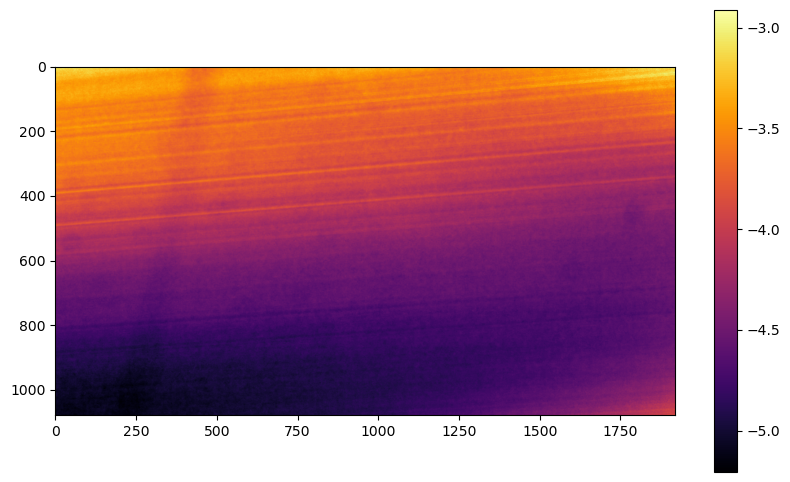

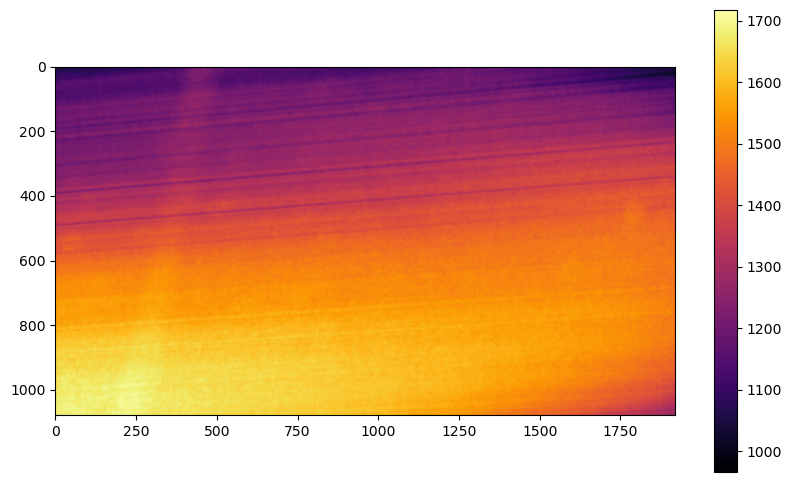

In [21]:
# Linear Calibration
a = (mean_53_Image - mean_26_Image) / (53-26)
b = ((273+53)*mean_26_Image - (273+26)*mean_53_Image) / (53-26)
x = np.linspace(293,343)
I_75_75 = a[75,75]*x + b[75,75]
I_150_150 = a[150,150]*x + b[150,150]
I_350_350 = a[350,350]*x + b[350,350]
I_500_500 = a[500,500]*x + b[500,500]

plt.figure(figsize=(10, 6))
plt.plot(x, I_75_75 , label='(75,75)', color='c')
plt.plot(x, I_150_150 , label='(150,150)', color='b')
plt.plot(x, I_350_350 , label='(350,350)', color='r')
plt.plot(x, I_500_500 , label='(500,500)', color='g')
plt.legend()
plt.xlabel('Temperature K')
plt.ylabel('Intensity')
plt.show()

a_ref = (mean_53_Image_reference - mean_26_Image_reference) / (53-26)
b_ref = ((273+53)*mean_26_Image_reference - (273+26)*mean_53_Image_reference) / (53-26)
x = np.linspace(293,343)
I_75_75_ref = a_ref[75,75]*x + b_ref[75,75]
I_150_150_ref = a_ref[150,150]*x + b_ref[150,150]
I_350_350_ref = a_ref[350,350]*x + b_ref[350,350]
I_500_500_ref = a_ref[500,500]*x + b_ref[500,500]
plt.figure(figsize=(10, 6))
plt.plot(x, I_75_75_ref , label='(75,75)', color='c')
plt.plot(x, I_150_150_ref , label='(150,150)', color='b')
plt.plot(x, I_350_350_ref , label='(350,350)', color='r')
plt.plot(x, I_500_500_ref , label='(500,500)', color='g')
plt.legend()
plt.xlabel('Temperature K')
plt.ylabel('Intensity / I0')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(a, cmap=plt.cm.inferno)
plt.colorbar()  
plt.figure(figsize=(10, 6))
plt.imshow(b, cmap=plt.cm.inferno)
plt.colorbar()  

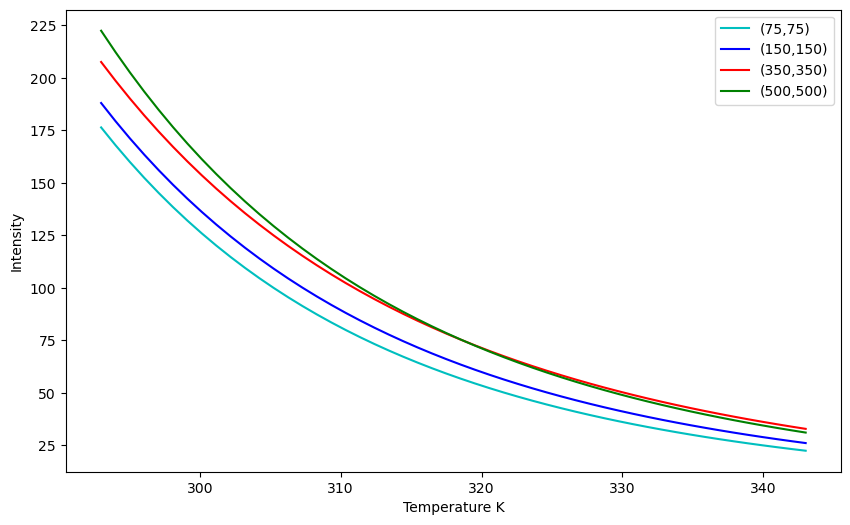

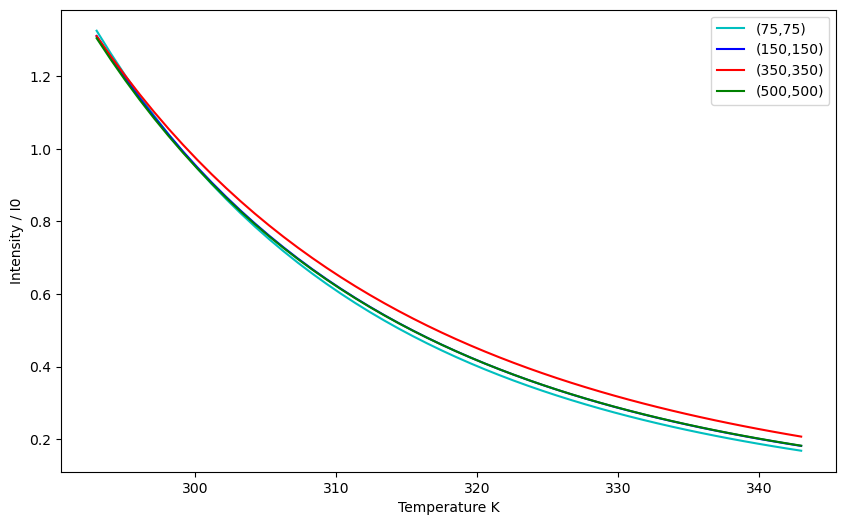

k (75,75):     0.00012450409
k (150,150):   0.00024110294
k (350,350):   0.0006606018
k (500,500):   0.00030080523
B (75,75):     4150.062
B (150,150):   3975.1343
B (350,350):   3708.7888
B (500,500):   3959.587


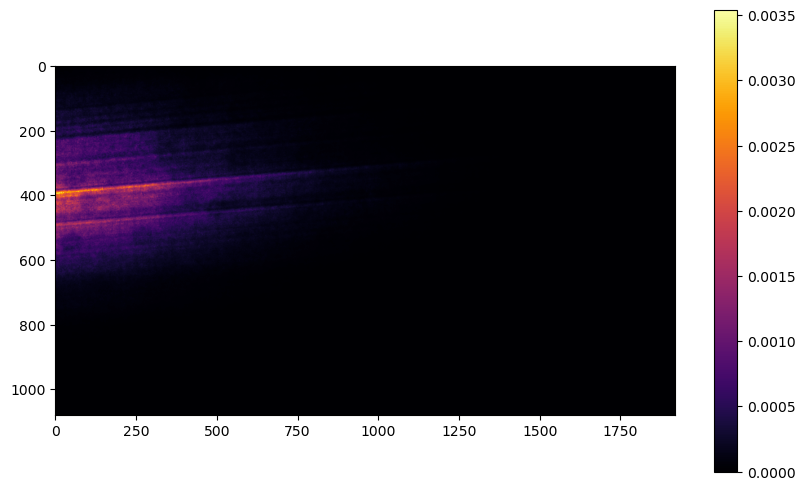

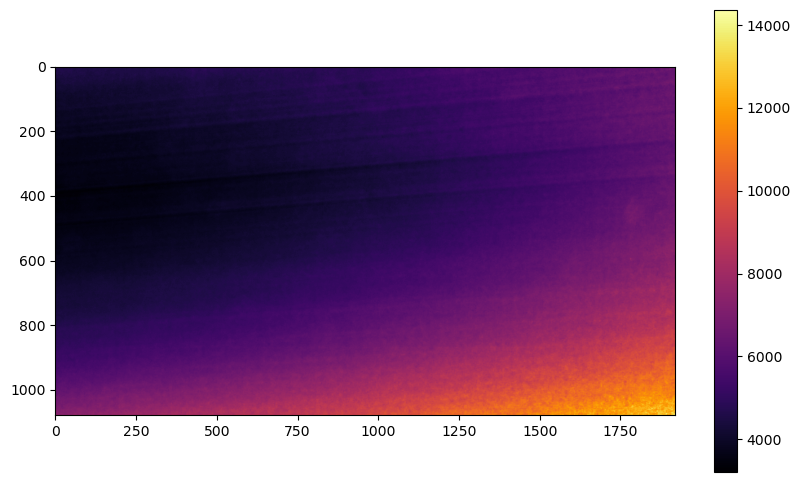

In [22]:
# Calibration
Beta = np.log(mean_53_Image/mean_26_Image) / ((1/(273+53)) - (1/(273+26)))
k_26 = mean_26_Image * np.exp(-Beta/(273+26))
k_53 = mean_53_Image * np.exp(-Beta/(273+53))
x = np.linspace(293,343)
# Iexp_75_75 = k_26[75,75]* np.exp(Beta[75,75]/x)
# Iexp_150_150 = k_26[150,150]* np.exp(Beta[150,150]/x)
# Iexp_350_350 = k_26[350,350]* np.exp(Beta[350,350]/x)
# Iexp_500_500 = k_26[500,500]* np.exp(Beta[500,500]/x)
# Iexp_750_750 = k_26[750,750]* np.exp(Beta[750,750]/x)

Iexp_75_75 = k_53[75,75]* np.exp(Beta[75,75]/x)
Iexp_150_150 = k_53[150,150]* np.exp(Beta[150,150]/x)
Iexp_350_350 = k_53[350,350]* np.exp(Beta[350,350]/x)
Iexp_500_500 = k_53[500,500]* np.exp(Beta[500,500]/x)
Iexp_750_750 = k_53[750,750]* np.exp(Beta[750,750]/x)

plt.figure(figsize=(10, 6))
plt.plot(x, Iexp_75_75 , label='(75,75)', color='c')
plt.plot(x, Iexp_150_150 , label='(150,150)', color='b')
plt.plot(x, Iexp_350_350 , label='(350,350)', color='r')
plt.plot(x, Iexp_500_500 , label='(500,500)', color='g')
plt.legend()
plt.xlabel('Temperature K')
plt.ylabel('Intensity')
plt.show()

Beta_ref = np.log(mean_53_Image_reference/mean_26_Image_reference) / ((1/(273+53)) - (1/(273+26)))
k_26_ref = mean_26_Image_reference * np.exp(-Beta/(273+26))
k_53_ref = mean_53_Image_reference * np.exp(-Beta/(273+53))
x = np.linspace(293,343)
Iexp_75_75_ref = k_53_ref[75,75]* np.exp(Beta_ref[75,75]/x)
Iexp_150_150_ref = k_53_ref[150,150]* np.exp(Beta_ref[150,150]/x)
Iexp_350_350_ref = k_53_ref[350,350]* np.exp(Beta_ref[350,350]/x)
Iexp_500_500_ref = k_53_ref[500,500]* np.exp(Beta_ref[500,500]/x)
Iexp_750_750_ref = k_53_ref[750,750]* np.exp(Beta_ref[750,750]/x)
plt.figure(figsize=(10, 6))
plt.plot(x, Iexp_75_75_ref , label='(75,75)', color='c')
plt.plot(x, Iexp_150_150_ref , label='(150,150)', color='b')
plt.plot(x, Iexp_350_350_ref , label='(350,350)', color='r')
plt.plot(x, Iexp_500_500_ref , label='(500,500)', color='g')
plt.legend()
plt.xlabel('Temperature K')
plt.ylabel('Intensity / I0')
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(k_53, cmap=plt.cm.inferno)
plt.colorbar()  
plt.figure(figsize=(10, 6))
plt.imshow(Beta, cmap=plt.cm.inferno)
plt.colorbar()  

print("k (75,75):    ", k_53[75,75])
print("k (150,150):  ", k_53[150,150])
print("k (350,350):  ", k_53[350,350])
print("k (500,500):  ", k_53[500,500])

print("B (75,75):    ", Beta[75,75])
print("B (150,150):  ", Beta[150,150])
print("B (350,350):  ", Beta[350,350])
print("B (500,500):  ", Beta[500,500])

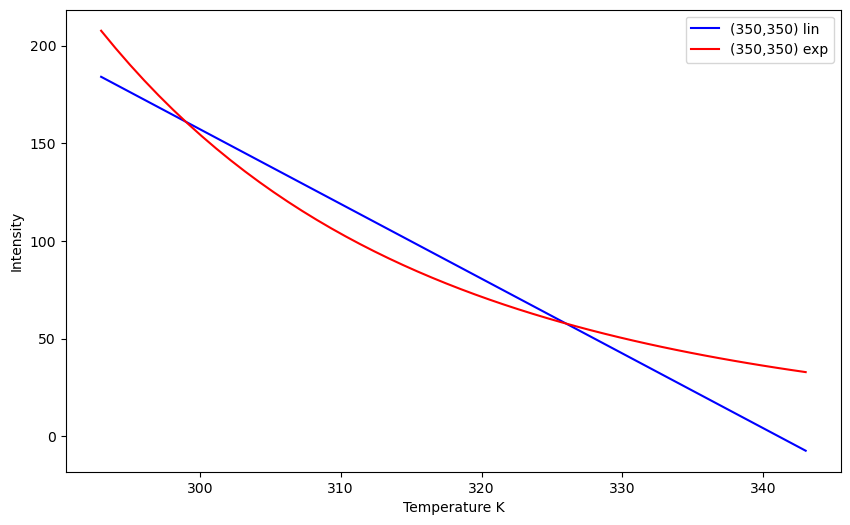

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(x, I_350_350 , label='(350,350) lin', color='b')
plt.plot(x, Iexp_350_350 , label='(350,350) exp', color='r')
plt.legend()
plt.xlabel('Temperature K')
plt.ylabel('Intensity')
plt.show()

In [24]:
# 6
path = "T/"
Images = []
count_6 = 0

for filename in tqdm(os.listdir(path)):
    IMG = (cv2.imread(os.path.join(path, filename), cv2.IMREAD_GRAYSCALE)).astype('float32')
    Images.append(np.array(IMG) - mean_back_Image)
    count_6 = count_6 + 1
    

100%|██████████| 83/83 [00:02<00:00, 28.10it/s]


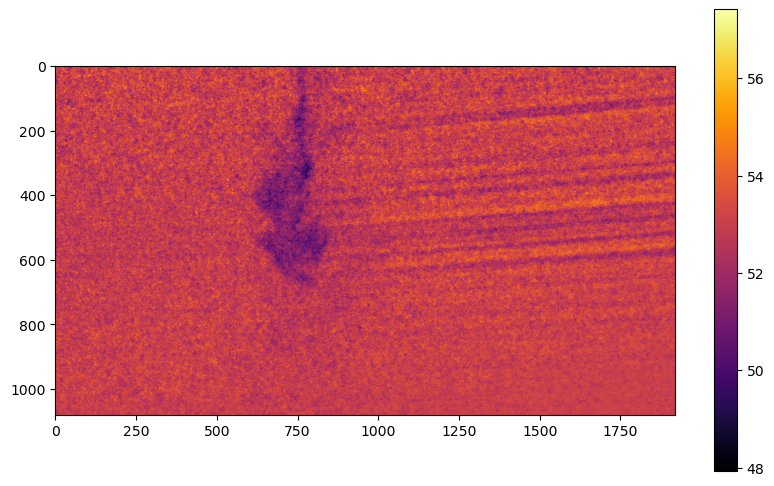

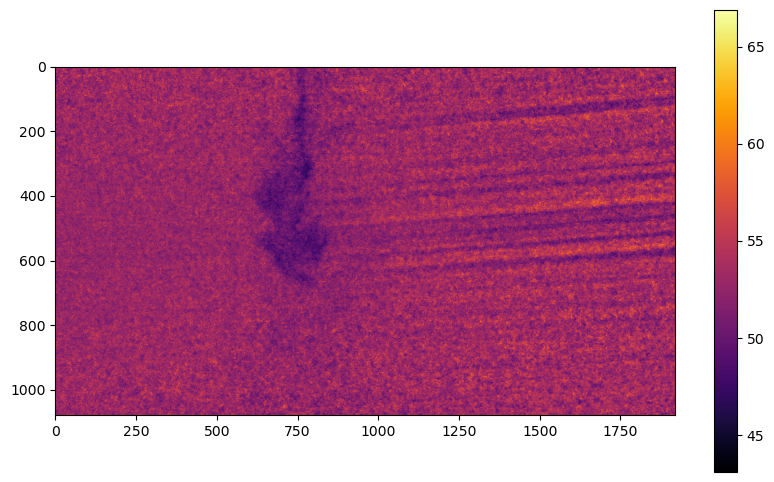

In [25]:
T_lin = ((Images[11])-b)/a
T_exp = Beta/ np.log((Images[11])/k_53)

T_lin_centi = T_lin - 273
T_exp_centi = T_exp - 273

# plt.figure(figsize=(10, 6))
# plt.imshow(T_lin, cmap=plt.cm.inferno)
# plt.colorbar()
# plt.figure(figsize=(10, 6))
# plt.imshow(T_exp, cmap=plt.cm.inferno)
# plt.colorbar()
plt.figure(figsize=(10, 6))
plt.imshow(T_lin_centi, cmap=plt.cm.inferno)
plt.colorbar()
plt.figure(figsize=(10, 6))
plt.imshow(T_exp_centi, cmap=plt.cm.inferno)
plt.colorbar()

In [26]:
print("T_lin (75,75) :        ", T_lin_centi[75,75])
print("T_lin (150,150) :      ", T_lin_centi[150,150])
print("T_lin (350,350) :      ", T_lin_centi[350,350])
print("T_lin (500,500) :      ", T_lin_centi[500,500])


print("T_exp (75,75) :        ", T_exp_centi[75,75])
print("T_exp (150,150) :      ", T_exp_centi[150,150])
print("T_exp (350,350) :      ", T_exp_centi[350,350])
print("T_exp (500,500) :      ", T_exp_centi[500,500])

# Error calculation
T_lin_mean = ((T_lin[75,75] + T_lin[150,150] + T_lin[350,350] + T_lin[500,500]) / 4)
T_exp_mean = ((T_exp[75,75] + T_exp[150,150] + T_exp[350,350] + T_exp[500,500]) / 4)
sigma_lin = np.sqrt(((T_lin[75,75] - T_lin_mean)**2 + (T_lin[150,150] - T_lin_mean)**2 + (T_lin[350,350] - T_lin_mean)**2 + (T_lin[500,500] - T_lin_mean)**2) / 3)
Error_75_lin = ((sigma_lin / Images[11][75,75]) * (a[75,75]*T_lin[75,75] + b[75,75]) / T_lin[75,75]) * 100
Error_150_lin = ((sigma_lin / Images[11][150,150]) * (a[150,150]*T_lin[150,150] + b[150,150]) / T_lin[150,150]) * 100
Error_350_lin = ((sigma_lin / Images[11][350,350]) * (a[350,350]*T_lin[350,350] + b[350,350]) / T_lin[350,350]) * 100
Error_500_lin = ((sigma_lin / Images[11][500,500]) * (a[500,500]*T_lin[500,500] + b[500,500]) / T_lin[500,500]) * 100
print("Error lin (75,75):      ", Error_75_lin)
print("Error lin (150,150):    ", Error_150_lin)
print("Error lin (350,350):    ", Error_350_lin)
print("Error lin (500,500):    ", Error_500_lin)
print(a[75,75])
print(b[75,75])
print(sigma_lin)
print(T_lin[75,75])
print(Images[11][75,75])

sigma_exp = np.sqrt(((T_exp[75,75] - T_exp_mean)**2 + (T_exp[150,150] - T_exp_mean)**2 + (T_exp[350,350] - T_exp_mean)**2 + (T_exp[500,500] - T_exp_mean)**2) / 3)
I0_11 = np.mean(Images[11])
Error_75_exp = ((sigma_exp / Images[11][75,75]) + (sigma_exp / I0_11)) * (T_exp[75,75] / Beta[75,75]) * 100
Error_150_exp = ((sigma_exp / Images[11][150,150]) + (sigma_exp / I0_11)) * (T_exp[150,150] / Beta[150,150]) * 100
Error_350_exp = ((sigma_exp / Images[11][350,350]) + (sigma_exp / I0_11)) * (T_exp[350,350] / Beta[350,350]) * 100
Error_500_exp = ((sigma_exp / Images[11][500,500]) + (sigma_exp / I0_11)) * (T_exp[500,500] / Beta[500,500]) * 100
print("Error exp (75,75):      ", Error_75_exp)
print("Error exp (150,150):    ", Error_150_exp)
print("Error exp (350,350):    ", Error_350_exp)
print("Error exp (500,500):    ", Error_500_exp)
print(sigma_exp)
print(I0_11)
print(Images[11][75,75])
print(T_exp[75,75])
print(Beta[75,75])


T_lin (75,75) :         52.742065
T_lin (150,150) :       53.197662
T_lin (350,350) :       53.66156
T_lin (500,500) :       51.438873
T_exp (75,75) :         52.478516
T_exp (150,150) :       53.39633
T_exp (350,350) :       54.29294
T_exp (500,500) :       50.09662
Error lin (75,75):       0.29392470273626803
Error lin (150,150):     0.2935141944639594
Error lin (350,350):     0.2930973708481401
Error lin (500,500):     0.29510489627125974
-3.3597338
1137.3325
0.9574369080083267
325.74207
42.925926
Error exp (75,75):       0.7426589900689561
Error exp (150,150):     0.7480910755902316
Error exp (350,350):     0.7535945439013141
Error exp (500,500):     0.6626560241086857
1.8052944589403679
34.296547
42.925926
325.47852
4150.062
